<a href="https://colab.research.google.com/github/AExzxt/IA/blob/main/Actividades/AF6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 6. Aprendizaje supervisado, árbol de decisión**

In [17]:
# IMC	2003759	Nicolás Israel García Aldana  N4
# IMC	2177765	Aldrin Emmanuel Naranjo Hernández N4
# IMC	2063766	Alan Javier Peña Puente N4
# IMC	2065133	Brian Alexis Medrano Franco N4
# IMC	1992270	Iván Alejandro Alvarado Segovia N5

1) Cargar librerías

In [18]:
# Árbol de Decisión en Breast Cancer (Wisconsin)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


2) Cargar datos

In [19]:

data = load_breast_cancer(as_frame=True)
X = data.data            # 30 características
y = data.target          # 0 = malignant, 1 = benign

print("Dataset:")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape:   {y.shape}")
display(X.head())


Dataset:
Features (X) shape: (569, 30)
Target (y) shape:   (569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


3) Preprocesamiento (split 80/20 con estratificación)


In [20]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,            # 20% prueba
    random_state=RANDOM_STATE,
    stratify=y
)

print("\nTamaños de los conjuntos:")
print("X_train:", X_train.shape, " y_train:", y_train.shape)
print("X_test: ", X_test.shape,  " y_test: ", y_test.shape)


Tamaños de los conjuntos:
X_train: (455, 30)  y_train: (455,)
X_test:  (114, 30)  y_test:  (114,)


4) Selección y entrenamiento del modelo

In [21]:
# 4) Selección y entrenamiento del modelo
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

# Exactitud del modelo en el entrenamiento.
train_accuracy = clf.score(X_train, y_train)
print(train_accuracy)

print("\nModelo entrenado.")
print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de hojas:       {clf.get_n_leaves()}")

1.0

Modelo entrenado.
Profundidad del árbol: 7
Número de hojas:       19


5) Pruebas del modelo


Predicciones en prueba:
[0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]

Matriz de confusión (valores):
 [[39  3]
 [ 7 65]]


<Figure size 1920x1440 with 0 Axes>

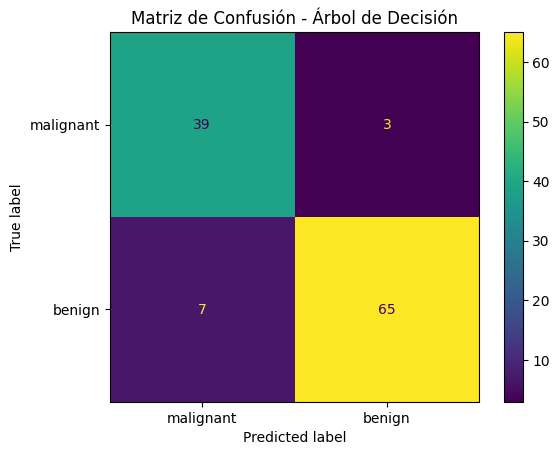

In [22]:

y_pred = clf.predict(X_test)
print("\nPredicciones en prueba:")
print(y_pred)

# 5.1) Matriz de confusión (valores)
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión (valores):\n", cm)

# Visualización de la matriz de confusión (DPI=300)
plt.figure(dpi=300)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(values_format='d')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()



In [23]:
# 5.2) Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy (precisión) en prueba: {acc:.4f}")

# 5.3) Classification report
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))



Accuracy (precisión) en prueba: 0.9123

Classification report:
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



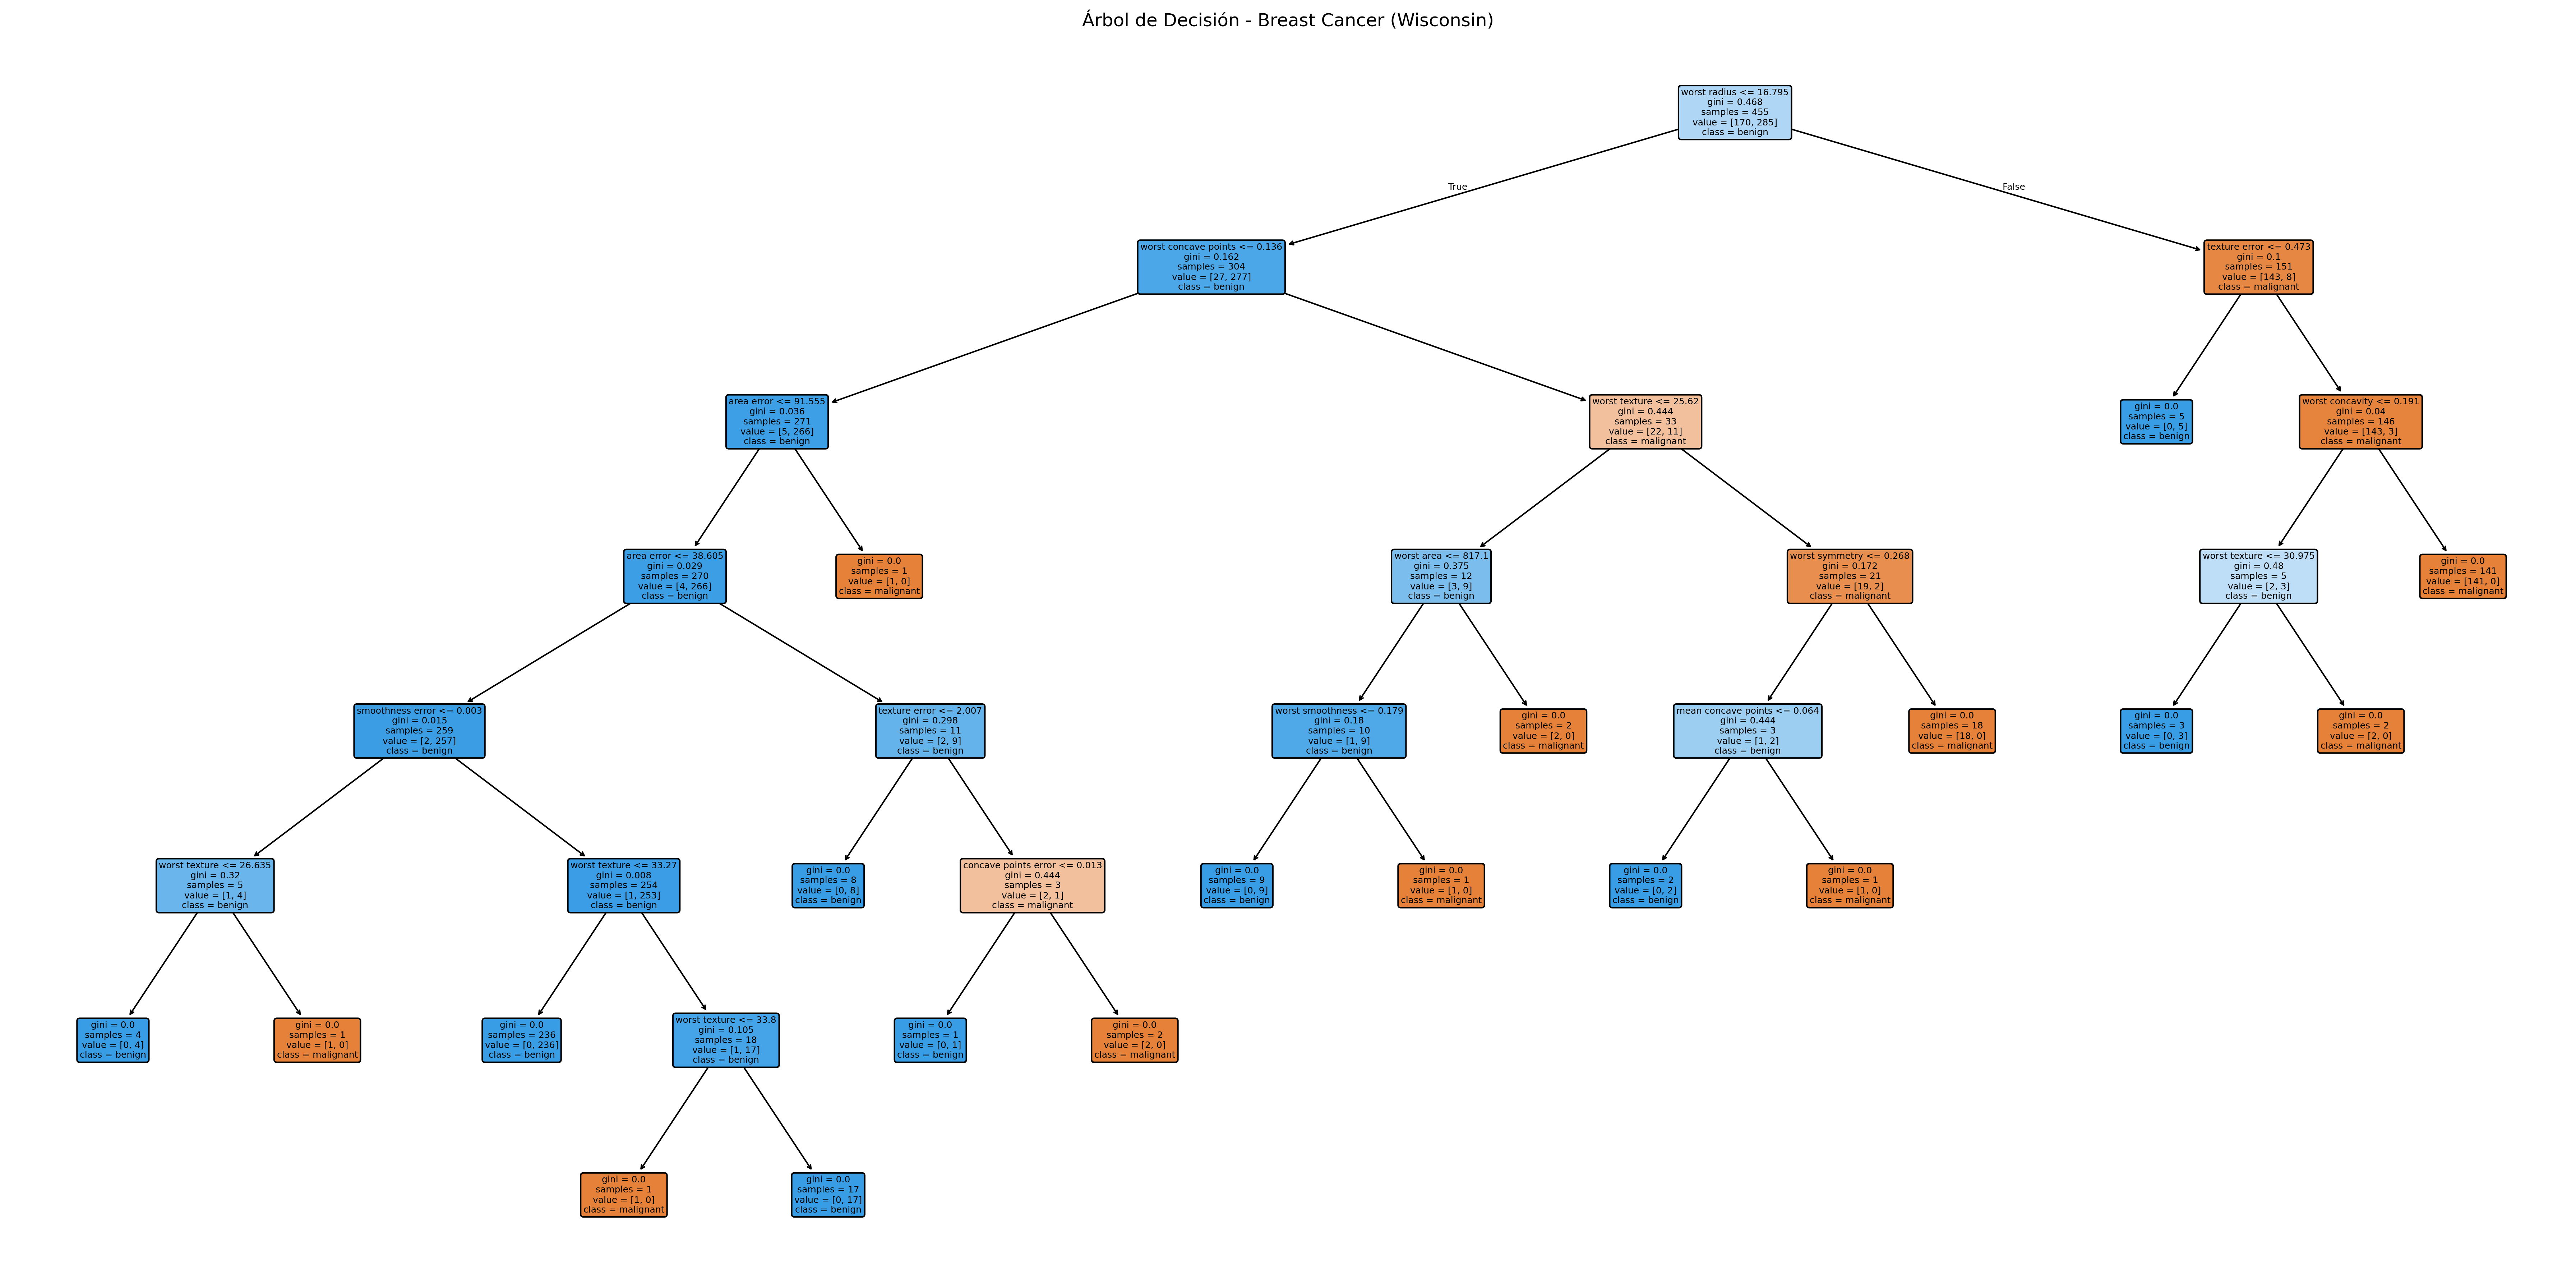

In [24]:
# 5.4) Visualización del árbol de decisión (DPI=300)
plt.figure(figsize=(24, 12), dpi=300)
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=6
)
plt.title("Árbol de Decisión - Breast Cancer (Wisconsin)")
plt.tight_layout()
plt.show()
